In [1]:
import numpy as np
import pandas as pd

In [3]:
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/intro_cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")

In [30]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart


In [15]:
# Dimensões do data frame
houses.shape

(1744, 13)

## Definindo se um imóvel está à venda ou para locação a partir do preço

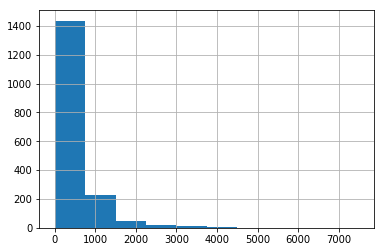

In [36]:
(houses['price']/1000).hist()

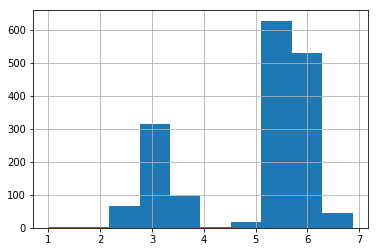

In [38]:
houses['log_price'] = houses['price'].apply(np.log10)
houses[houses['log_price'] > 0]['log_price'].hist()

In [44]:
# Adicionando coluna para aluguel e venda
houses['operation'] = 'sell'
houses.loc[(houses['price'] > 100) & (houses['price'] < 30000),'operation'] = 'rent'
houses = houses.drop(['log_price'], axis=1)
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,rent
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,sell
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,sell
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,sell
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,sell


In [46]:
houses.dtypes

price          int64
latitude     float64
longitude    float64
bedrooms     float64
area         float64
pkspaces     float64
bathrooms    float64
ensuites     float64
suburb        object
district      object
city          object
state         object
type          object
operation     object
dtype: object

## Estatísticas univariadas

Exercícios:

1. Calcule a média (mean), mediana (median), moda (mode), variância (var), desvio padrão (std) para preço e área de imóveis à venda.
2. Calucle o IQR da área e preço (dica: describe)
3. Calcule o preço médio do metro quadrado de venda e aluguel para Recife
5. Calcule o preço médio do metro quadrado de venda para apartamentos e casas
6. Calcule a área média de venda para apartamentos e casas
7. Encontre os bairros com maior e menor valor de venda do metro quadrado
8. Calcule a média e mediana de venda do metro quadrado por bairros (dica: usar groupby)
9. Calcule a média do metro quadrado em apartamentos de no máximo 3 quartos no bairro Espinheiro
10. Encontre os bairros com a menor e maior mediana de área

In [8]:
houses['price'].mean()

465050.814793578

In [9]:
houses['price'].median()

350000.0

In [10]:
houses['price'].mode()

0    350000
dtype: int64

In [11]:
houses['price'].var()

351306173214.81964

In [28]:
houses['price'].std()

592710.8681429924

In [29]:
houses['area'].describe()

count    1721.000000
mean      120.782493
std        95.680958
min        25.000000
25%        70.000000
50%        94.000000
75%       139.000000
max      1682.000000
Name: area, dtype: float64

In [25]:
houses['area'].describe()[6] - houses['area'].describe()[4]

69.0

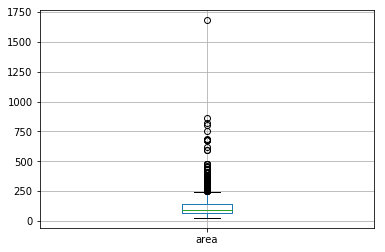

In [27]:
houses.boxplot(column=['area'])

In [72]:
houses['price_square_meter'] = houses['price']/houses['area']

In [74]:
houses[(houses.type == 'apart') & (houses.bedrooms <= 3) & (houses.suburb == 'Espinheiro')].price_square_meter.mean()

4033.597020052011

In [76]:
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].mean()

suburb
Aflitos              5057.981293
Apipucos             4953.378876
Areias               2317.073171
Arruda               3599.960047
Boa Viagem           5784.767213
Boa Vista            3499.194950
Campo Grande         4648.761296
Casa Amarela         5351.374665
Casa Forte           6183.445243
CaxangÌÁ             4587.357285
Coelhos              4666.666667
Cohab                1933.333333
Cordeiro             4083.564554
Derby                9043.387168
Encruzilhada         5052.220649
Engenho do Meio      9641.890805
Espinheiro           5231.928476
FundÌ£o              3920.280333
GraÌ¤as              4350.551441
HipÌ_dromo           2502.343750
Ibura                5990.463333
Ilha do Retiro       6055.816062
Imbiribeira          9902.509394
Ipsep                2777.982481
Iputinga             1770.728716
Jaqueira             6742.418062
Jardim SÌ£o Paulo       0.003597
Madalena             5794.175868
Mangabeira           4138.295095
Monteiro             6544.807869
Par

In [77]:
houses[houses['operation']=='sell'].groupby(['suburb']).agg(['mean','median'])['price_square_meter']

,mean,median
suburb,,
Aflitos,5057.981293,4897.959184
Apipucos,4953.378876,4317.180617
Areias,2317.073171,2317.073171
Arruda,3599.960047,4000.000000
Boa Viagem,5784.767213,5351.562500
Boa Vista,3499.194950,3240.384615
Campo Grande,4648.761296,4130.434783
Casa Amarela,5351.374665,5806.451613
Casa Forte,6183.445243,6272.727273


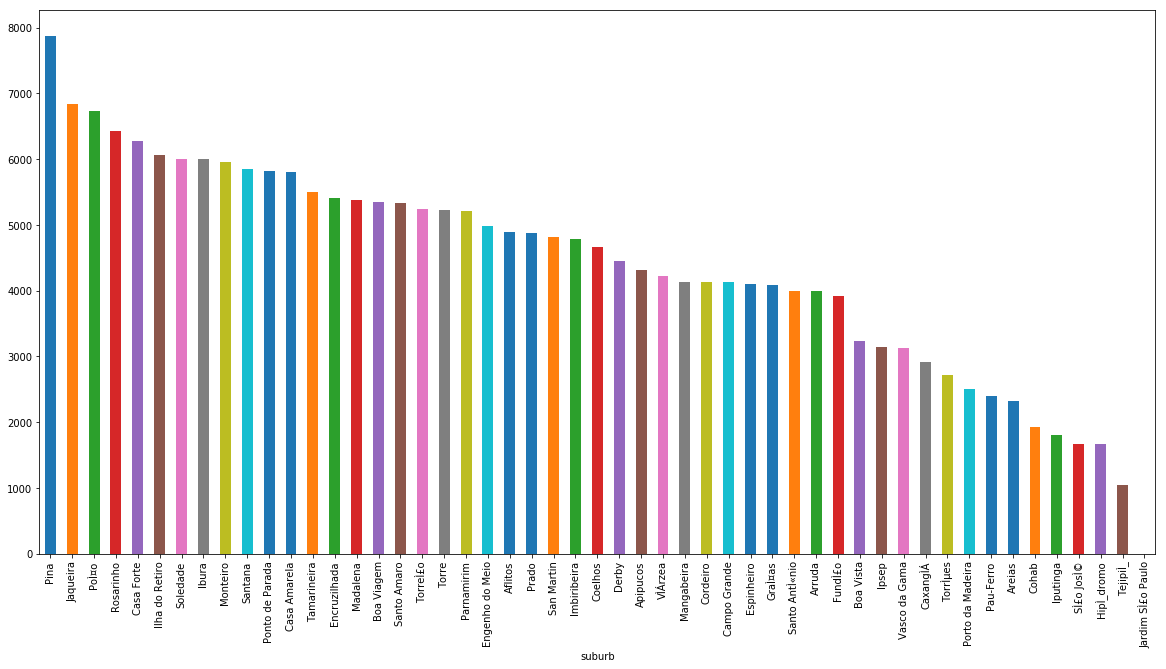

In [83]:
# Medianas do valor de venda por metro quadrado para cada bairro
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [81]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')].describe()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_square_meter
count,1.300000e+01,13.000000,13.000000,13.000000,13.000000,10.000000,11.000000,7.0,13.000000
mean,1.193943e+06,-8.055494,-34.893257,3.230769,213.623846,1.700000,3.090909,1.0,9607.917369
std,1.868665e+06,0.000952,0.002665,1.012739,442.405253,0.823273,0.301511,0.0,14132.119159
min,2.500000e+05,-8.056280,-34.895347,1.000000,40.110000,0.000000,3.000000,1.0,1948.694030
25%,3.650000e+05,-8.055979,-34.895347,3.000000,51.000000,1.250000,3.000000,1.0,5391.304348
50%,6.200000e+05,-8.055979,-34.895347,3.000000,115.000000,2.000000,3.000000,1.0,6000.000000
75%,6.900000e+05,-8.054936,-34.890077,4.000000,115.000000,2.000000,3.000000,1.0,6606.831214
max,7.000000e+06,-8.052734,-34.889466,5.000000,1682.000000,3.000000,4.000000,1.0,56039.215686


In [82]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation,price_square_meter
179,365000,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,sell,7156.862745
182,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,6000.000000
231,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,5391.304348
400,2858000,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,sell,56039.215686
476,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,5391.304348
618,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,6000.000000
628,592139,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,sell,11610.568627
752,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,6000.000000
788,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,5391.304348
862,261125,-8.055979,-34.895347,4.0,134.00,3.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,1948.694030


## Estatísticas bivariadas

In [70]:
houses[houses.operation=='sell'].cov()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites
price,3.721389e+11,-1999.977923,-406.086832,290147.471149,4.074410e+07,313539.013387,399166.264393,325102.123490
latitude,-1.999978e+03,0.000997,-0.000043,-0.003184,-1.319676e-01,-0.001827,0.003173,-0.000310
longitude,-4.060868e+02,-0.000043,0.000235,-0.001120,-1.626464e-01,-0.002373,-0.001245,-0.002352
bedrooms,2.901475e+05,-0.003184,-0.001120,1.107533,5.933180e+01,0.725591,0.765183,0.419521
area,4.074410e+07,-0.131968,-0.162646,59.331799,1.047730e+04,63.454343,74.397149,58.567118
pkspaces,3.135390e+05,-0.001827,-0.002373,0.725591,6.345434e+01,1.132119,0.758008,0.573380
bathrooms,3.991663e+05,0.003173,-0.001245,0.765183,7.439715e+01,0.758008,1.503196,0.878985
ensuites,3.251021e+05,-0.000310,-0.002352,0.419521,5.856712e+01,0.573380,0.878985,0.859048


In [62]:
houses[houses.operation=='sell'].corr(method='pearson')

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites
price,1.000000,-0.103833,-0.043440,0.451947,0.653239,0.516360,0.519452,0.679669
latitude,-0.103833,1.000000,-0.089303,-0.095828,-0.040688,-0.056983,0.082587,-0.015053
longitude,-0.043440,-0.089303,1.000000,-0.069431,-0.103359,-0.147966,-0.065269,-0.165846
bedrooms,0.451947,-0.095828,-0.069431,1.000000,0.566756,0.663270,0.656487,0.562102
area,0.653239,-0.040688,-0.103359,0.566756,1.000000,0.578285,0.597956,0.669119
pkspaces,0.516360,-0.056983,-0.147966,0.663270,0.578285,1.000000,0.600024,0.649819
bathrooms,0.519452,0.082587,-0.065269,0.656487,0.597956,0.600024,1.000000,0.850007
ensuites,0.679669,-0.015053,-0.165846,0.562102,0.669119,0.649819,0.850007,1.000000


In [64]:
houses[houses.operation=='sell'].corr(method='spearman')

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites
price,1.000000,-0.051958,-0.064619,0.605889,0.677172,0.666850,0.614717,0.718041
latitude,-0.051958,1.000000,-0.203359,-0.130603,-0.072948,-0.090733,0.034849,0.070180
longitude,-0.064619,-0.203359,1.000000,-0.053422,-0.101860,-0.136235,-0.051549,-0.177310
bedrooms,0.605889,-0.130603,-0.053422,1.000000,0.736542,0.696236,0.696805,0.634320
area,0.677172,-0.072948,-0.101860,0.736542,1.000000,0.704613,0.673969,0.658985
pkspaces,0.666850,-0.090733,-0.136235,0.696236,0.704613,1.000000,0.585076,0.626918
bathrooms,0.614717,0.034849,-0.051549,0.696805,0.673969,0.585076,1.000000,0.803017
ensuites,0.718041,0.070180,-0.177310,0.634320,0.658985,0.626918,0.803017,1.000000


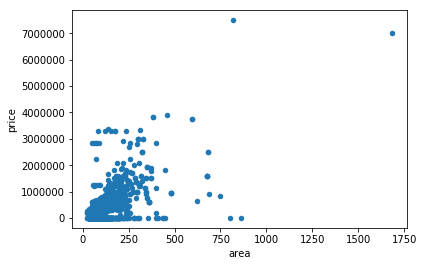

In [66]:
houses.plot.scatter(x='area',y='price')

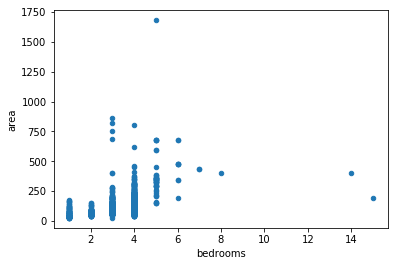

In [68]:
houses.plot.scatter(x='bedrooms',y='area')

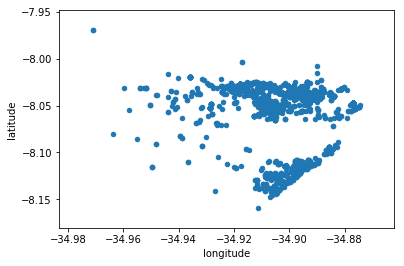

In [69]:
houses.plot.scatter(x='longitude',y='latitude')